# Ch `04`: Concept `01`

## Linear regression for classification (just for demonstrative purposes)

Import the usual libraries:

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Let's say we have numbers that we want to classify. They'll just be 1-dimensional values. Numbers close to 5 will be given the label `[0]`, and numbers close to 2 will be given the label `[1]`, as designed here:

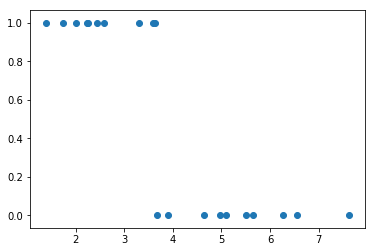

In [2]:
x_label0 = np.random.normal(5, 1, 10)
x_label1 = np.random.normal(2, 1, 10)
xs = np.append(x_label0, x_label1)
labels = [0.] * len(x_label0) + [1.] * len(x_label1)

plt.scatter(xs, labels)

Define the hyper-parameters, placeholders, and variables:

In [3]:
learning_rate = 0.001
training_epochs = 1000

X = tf.placeholder("float")
Y = tf.placeholder("float")

w = tf.Variable([0., 0.], name="parameters")

Instructions for updating:
Colocations handled automatically by placer.


Define the model:

In [4]:
def model(X, w):
    return tf.add(tf.multiply(w[1], tf.pow(X, 1)),
                  tf.multiply(w[0], tf.pow(X, 0)))

Given a model, define the cost function:

In [5]:
y_model = model(X, w)
cost = tf.reduce_sum(tf.square(Y-y_model))

Set up the training op, and also introduce a couple ops to calculate some metrics, such as accuracy:

In [6]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
correct_prediction = tf.equal(Y, tf.to_float(tf.greater(y_model, 0.5)))
accuracy = tf.reduce_mean(tf.to_float(correct_prediction))

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


Prepare the session:

In [7]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

Run the training op multiple times on the input data:

In [8]:
for epoch in range(training_epochs):
    sess.run(train_op, feed_dict={X: xs, Y: labels})
    current_cost = sess.run(cost, feed_dict={X: xs, Y: labels})
    if epoch % 100 == 0:
        print(epoch, current_cost)

0 8.176775
100 3.4575558
200 2.1082108
300 1.7148372
400 1.6001569
500 1.5667243
600 1.5569777
700 1.5541362
800 1.5533079
900 1.5530664


Show some final metrics/results:

In [9]:
w_val = sess.run(w)
print('learned parameters', w_val)

print('accuracy', sess.run(accuracy, feed_dict={X: xs, Y: labels}))

sess.close()

learned parameters [ 1.4461104  -0.23961192]
accuracy 0.9


Plot the learned function

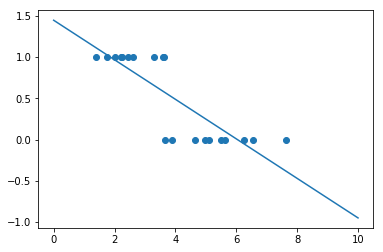

In [10]:
all_xs = np.linspace(0, 10, 100)
plt.plot(all_xs, all_xs*w_val[1] + w_val[0])
plt.scatter(xs, labels)
plt.show()